In [ ]:
!pip install pyECLAT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
from pyECLAT import ECLAT
from mlxtend.frequent_patterns import fpmax
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

import tracemalloc

### read dataset

In [ ]:
# retail_dataset = pd.read_csv('retail.dat',header = None)
retail_file = open("retail.dat", "r")
retail_array = [[str(n) for n in line.split()] for line in retail_file]
# retail_dataset

In [ ]:
r = pd.read_csv('retail.dat',header =None)
r

,0
0,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
1,30 31 32
2,33 34 35
3,36 37 38 39 40 41 42 43 44 45 46
4,38 39 47 48
...,...
88157,39 875 2665 2962 12959 14070 14406 15518 16379
88158,39 41 101 346 393 413 479 522 586 635 695 799 ...
88159,2310 4267
88160,39 48 2528


### convert to one hot encoder

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(retail_array).transform(retail_array)
retail_onehotdf = pd.DataFrame(te_ary, columns=te.columns_)
retail_onehotdf.head(5)

,0,1,10,100,1000,10000,10001,10002,10003,10004,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
retail_onehotdf.shape[0]

88162

### apriori

In [ ]:
start_time = datetime.now()
tracemalloc.start()
frequent_itemsets5 = apriori(retail_onehotdf, min_support=0.5, use_colnames=True)
end_time = datetime.now()
print("memory",tracemalloc.get_traced_memory())
print("duration",end_time - start_time)
tracemalloc.stop()
frequent_itemsets5

memory (155436, 2114079)
duration 0:00:02.431006


,support,itemsets
0,0.574794,(39)


In [ ]:
start_time = datetime.now()
frequent_itemsets4 = apriori(retail_onehotdf, min_support=0.4, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
frequent_itemsets4

Duration: 0:00:01.978479


,support,itemsets
0,0.574794,(39)
1,0.477927,(48)


In [ ]:
start_time = datetime.now()
frequent_itemsets3 = apriori(retail_onehotdf, min_support=0.3, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
frequent_itemsets3

Duration: 0:00:02.028229


,support,itemsets
0,0.574794,(39)
1,0.477927,(48)
2,0.330551,"(48, 39)"


In [ ]:
start_time = datetime.now()
tracemalloc.start()
frequent_itemsets1 = apriori(retail_onehotdf, min_support=0.1, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsets1

Duration: 0:00:02.515455
memory (159802, 3707258)


,support,itemsets
0,0.172036,(32)
1,0.176902,(38)
2,0.574794,(39)
3,0.169517,(41)
4,0.477927,(48)
5,0.117341,"(38, 39)"
6,0.129466,"(41, 39)"
7,0.330551,"(48, 39)"
8,0.102289,"(41, 48)"


In [ ]:
start_time = datetime.now()
tracemalloc.start()
frequent_itemsets05 = apriori(retail_onehotdf, min_support=0.05, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsets05

Duration: 0:00:02.758765
memory (426769, 5293664)


,support,itemsets
0,0.172036,(32)
1,0.176902,(38)
2,0.574794,(39)
3,0.169517,(41)
4,0.477927,(48)
5,0.050725,(65)
6,0.095903,"(32, 39)"
7,0.091128,"(48, 32)"
8,0.117341,"(38, 39)"
9,0.090107,"(38, 48)"


In [ ]:
start_time = datetime.now()
tracemalloc.start()
frequent_itemsets01 = apriori(retail_onehotdf, min_support=0.01, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsets01

Duration: 0:00:09.911106
memory (196698, 639815564)


,support,itemsets
0,0.012500,(1004)
1,0.025374,(101)
2,0.010004,(10515)
3,0.031692,(110)
4,0.016175,(1146)
...,...,...
154,0.013532,"(48, 38, 170, 39)"
155,0.014020,"(48, 32, 38, 39)"
156,0.018670,"(48, 41, 32, 39)"
157,0.012250,"(48, 38, 39, 36)"


In [ ]:
start_time = datetime.now()
tracemalloc.start()
frequent_itemsets005 = apriori(retail_onehotdf, min_support=0.005, use_colnames=True)
end_time = datetime.now()
print(end_time - start_time)
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsets005

KeyboardInterrupt: 

### association Rules

In [ ]:
rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.5)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(48),(39),0.477927,0.574794,0.330551,0.691634,1.203273,0.055841,1.378900
1,(39),(48),0.574794,0.477927,0.330551,0.575076,1.203273,0.055841,1.228628


In [ ]:
rules05 = association_rules(frequent_itemsets05, metric="confidence", min_threshold=0.5)
rules05

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(32),(39),0.172036,0.574794,0.095903,0.557460,0.969843,-0.002982,0.960831
1,(32),(48),0.172036,0.477927,0.091128,0.529703,1.108334,0.008907,1.110091
2,(38),(39),0.176902,0.574794,0.117341,0.663311,1.153998,0.015659,1.262904
3,(38),(48),0.176902,0.477927,0.090107,0.509361,1.065772,0.005561,1.064068
4,(41),(39),0.169517,0.574794,0.129466,0.763734,1.328708,0.032029,1.799689
5,(48),(39),0.477927,0.574794,0.330551,0.691634,1.203273,0.055841,1.378900
6,(39),(48),0.574794,0.477927,0.330551,0.575076,1.203273,0.055841,1.228628
7,(41),(48),0.169517,0.477927,0.102289,0.603413,1.262562,0.021272,1.316413
8,"(32, 48)",(39),0.091128,0.574794,0.061274,0.672392,1.169797,0.008894,1.297912
9,"(32, 39)",(48),0.095903,0.477927,0.061274,0.638912,1.336840,0.015439,1.445833


In [ ]:

frequent_itemsets11 = apriori(retail_ds, min_support=0.1, use_colnames=True ,max_len=1)

In [ ]:
frequent_itemsets11

,support,itemsets
0,0.172036,(32)
1,0.176902,(38)
2,0.574794,(39)
3,0.169517,(41)
4,0.477927,(48)


## FP Growth

In [ ]:
start_time=datetime.now()
tracemalloc.start()
frequent_itemsetsg5 = fpgrowth(retail_onehotdf, min_support=0.5, use_colnames = True)
end_time = datetime.now()
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
print('Duration: {}'.format(end_time - start_time))
frequent_itemsetsg5

memory (155091, 1457238)
Duration: 0:00:05.394884


,support,itemsets
0,0.574794,(39)


In [ ]:
start_time=datetime.now()
frequent_itemsetsg4 = fpgrowth(retail_onehotdf, min_support=0.4, use_colnames = True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
frequent_itemsetsg4

Duration: 0:00:04.111949


,support,itemsets
0,0.574794,(39)
1,0.477927,(48)


In [ ]:
start_time=datetime.now()
frequent_itemsetsg3 = fpgrowth(retail_onehotdf, min_support=0.3, use_colnames = True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
frequent_itemsetsg3

Duration: 0:00:03.256196


,support,itemsets
0,0.574794,(39)
1,0.477927,(48)
2,0.330551,"(48, 39)"


In [ ]:
start_time=datetime.now()
tracemalloc.start()
frequent_itemsetsg1 = fpgrowth(retail_onehotdf, min_support=0.1, use_colnames = True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsetsg1

Duration: 0:00:06.065012
memory (168996, 1457598)


,support,itemsets
0,0.172036,(32)
1,0.574794,(39)
2,0.176902,(38)
3,0.169517,(41)
4,0.477927,(48)
5,0.117341,"(38, 39)"
6,0.129466,"(41, 39)"
7,0.102289,"(41, 48)"
8,0.330551,"(48, 39)"


In [ ]:
start_time=datetime.now()
tracemalloc.start()
frequent_itemsetsg05 = fpgrowth(retail_onehotdf, min_support=0.05, use_colnames = True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsetsg05

Duration: 0:00:05.868634
memory (179200, 1457414)


,support,itemsets
0,0.172036,(32)
1,0.574794,(39)
2,0.176902,(38)
3,0.169517,(41)
4,0.477927,(48)
5,0.050725,(65)
6,0.095903,"(32, 39)"
7,0.091128,"(48, 32)"
8,0.061274,"(48, 32, 39)"
9,0.117341,"(38, 39)"


In [ ]:
start_time=datetime.now()
tracemalloc.start()
frequent_itemsetsg01 = fpgrowth(retail_onehotdf, min_support=0.01, use_colnames = True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsetsg01

Duration: 0:00:07.380689
memory (15918234, 6430991623)


,support,itemsets
0,0.015562,(9)
1,0.011399,(19)
2,0.172036,(32)
3,0.010435,(31)
4,0.574794,(39)
...,...,...
154,0.013112,"(1327, 39)"
155,0.010980,"(1327, 48)"
156,0.010832,"(48, 2238)"
157,0.014598,"(2238, 39)"


In [ ]:
start_time=datetime.now()
tracemalloc.start()
frequent_itemsetsg005 = fpgrowth(retail_onehotdf, min_support=0.005, use_colnames = True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsetsg005

Duration: 0:00:09.377060
memory (45534976, 47705096)


,support,itemsets
0,0.015562,(9)
1,0.011399,(19)
2,0.009755,(18)
3,0.008598,(23)
4,0.008076,(10)
...,...,...
575,0.006000,"(48, 39, 16010)"
576,0.007384,"(16011, 16010)"
577,0.008258,"(39, 16217)"
578,0.007339,"(48, 16217)"


## time plot

In [ ]:
frequency = [ 0.005 , 0.01 ,0.05,0.1, 0.3 , 0.4 , 0.5 ]

In [ ]:
time_fpGrowth = [04.998012 ,03.88958 ,03.557780 ,03.45488,3.3451,03.216132,03.208614]

In [ ]:
time_apriority = [124.118749 ,09.33210,02.122932,02.033204,02.159009 ,02.028229,01.978479]

In [ ]:
time_maxfp = [05.692223,4.781850,4.233635,04.485791,4.239180,04.045812,03.866754]

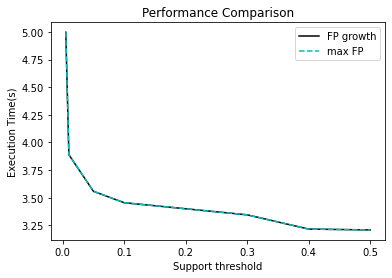

In [ ]:
plt.figure()

# plt.plot(frequency, time_apriority, label='apriori',c='m')
plt.plot(frequency, time_fpGrowth, label='FP growth',c='k')
plt.plot(frequency, time_fpGrowth, label='max FP',c="c",linestyle='dashed')
plt.title('Performance Comparison')
plt.xlabel('Support threshold')
plt.ylabel('Execution Time(s)')
plt.legend()



In [ ]:
start_time=datetime.now()
maxfp5 = fpmax(retail_onehotdf, min_support=0.5, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
maxfp5

Duration: 0:00:03.866754


,support,itemsets
0,0.574794,(39)


In [ ]:
start_time=datetime.now()
maxfp4 = fpmax(retail_onehotdf, min_support=0.4, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
maxfp4

Duration: 0:00:04.045812


,support,itemsets
0,0.477927,(48)
1,0.574794,(39)


In [ ]:
start_time=datetime.now()
maxfp3 = fpmax(retail_onehotdf, min_support=0.3, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
maxfp3

Duration: 0:00:04.239180


,support,itemsets
0,0.330551,"(48, 39)"


In [ ]:
start_time=datetime.now()
maxfp1 = fpmax(retail_onehotdf,
               min_support=0.1,
               use_colnames=True)
maxfp1

Duration: 0:00:04.485791


,support,itemsets
0,0.102289,"(41, 48)"
1,0.129466,"(41, 39)"
2,0.172036,(32)
3,0.117341,"(38, 39)"
4,0.330551,"(48, 39)"


In [ ]:
start_time=datetime.now()
maxfp05 = fpmax(retail_onehotdf, min_support=0.05, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
maxfp05

Duration: 0:00:04.233635


,support,itemsets
0,0.050725,(65)
1,0.083551,"(48, 41, 39)"
2,0.061274,"(48, 32, 39)"
3,0.069213,"(48, 38, 39)"


In [ ]:
start_time=datetime.now()
maxfp01 = fpmax(retail_onehotdf, min_support=0.01, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
maxfp01

Duration: 0:00:04.781850


,support,itemsets
0,0.010004,(10515)
1,0.010152,(264)
2,0.010254,(2958)
3,0.010333,(45)
4,0.010333,(242)
...,...,...
73,0.011286,"(41, 65)"
74,0.020383,"(48, 65, 39)"
75,0.018670,"(48, 41, 32, 39)"
76,0.022583,"(48, 41, 38, 39)"


In [ ]:
start_time=datetime.now()
maxfp005 = fpmax(retail_onehotdf, min_support=0.005, use_colnames=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
maxfp005

Duration: 0:00:05.692223


,support,itemsets
0,0.005013,(365)
1,0.005036,(47)
2,0.005048,(490)
3,0.005059,(1404)
4,0.005082,(1113)
...,...,...
279,0.005535,"(65, 39, 38)"
280,0.005581,"(48, 32, 65)"
281,0.005807,"(32, 65, 39)"
282,0.006204,"(48, 41, 65, 39)"


### ECLOT

In [ ]:
retail_array
retail_df= pd.DataFrame(retail_array , columns=None)
retail_df

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0,1,2,3,4,5,6,7,8,9,...,None,None,None,None,None,None,None,None,None,None
1,30,31,32,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,33,34,35,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,36,37,38,39,40,41,42,43,44,45,...,None,None,None,None,None,None,None,None,None,None
4,38,39,47,48,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88157,39,875,2665,2962,12959,14070,14406,15518,16379,None,...,None,None,None,None,None,None,None,None,None,None
88158,39,41,101,346,393,413,479,522,586,635,...,None,None,None,None,None,None,None,None,None,None
88159,2310,4267,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
88160,39,48,2528,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
min_n_products = 5
min_support = 10/len(retail_array)
max_length = max([len(x) for x in retail_array])
max_length

76

In [ ]:
from pyECLAT import Example1, Example2
ex1 = Example1().get()
ex2 = Example2().get()

In [ ]:
ex1

,0,1,2,3
0,milk,beer,bread,butter
1,coffe,bread,butter,NaN
2,coffe,bread,butter,NaN
3,milk,coffe,bread,butter
4,beer,NaN,NaN,NaN
5,butter,NaN,NaN,NaN
6,bread,NaN,NaN,NaN
7,bean,NaN,NaN,NaN
8,rice,bean,NaN,NaN
9,rice,NaN,NaN,NaN


In [ ]:
my_eclat = ECLAT(data=ex1, verbose=True)
my_eclat

100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1639.59it/s]


In [ ]:
my_eclat

### ECLOT

first find item with min suport .1
get those item to eclot and implement that with min support .5

In [ ]:
def get_fitem(min_support , onehotdf) :
    start_time = datetime.now()
    test05 = apriori(onehotdf, min_support=min_support, use_colnames=True ,max_len=1)
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))
    return test05['itemsets'].tolist()
fitem = get_fitem(0.005 , retail_onehotdf)
print(fitem)

Duration: 0:00:02.056535
[frozenset({'10'}), frozenset({'1004'}), frozenset({'101'}), frozenset({'1020'}), frozenset({'103'}), frozenset({'1043'}), frozenset({'10444'}), frozenset({'10446'}), frozenset({'105'}), frozenset({'10515'}), frozenset({'1067'}), frozenset({'107'}), frozenset({'11'}), frozenset({'110'}), frozenset({'1113'}), frozenset({'1135'}), frozenset({'1144'}), frozenset({'1146'}), frozenset({'117'}), frozenset({'1198'}), frozenset({'123'}), frozenset({'1239'}), frozenset({'12925'}), frozenset({'12929'}), frozenset({'12946'}), frozenset({'12959'}), frozenset({'13041'}), frozenset({'1327'}), frozenset({'1344'}), frozenset({'1355'}), frozenset({'136'}), frozenset({'1393'}), frozenset({'1404'}), frozenset({'14098'}), frozenset({'1417'}), frozenset({'1435'}), frozenset({'147'}), frozenset({'1479'}), frozenset({'14933'}), frozenset({'150'}), frozenset({'155'}), frozenset({'156'}), frozenset({'15618'}), frozenset({'1578'}), frozenset({'15832'}), frozenset({'1585'}), frozenset({'

In [ ]:
# print(fitem)
def make_list_of_f_items(fitem):
    fitemlist = []
    for x in fitem :
        fitemlist.append(int(list(x)[0]))
        print(fitemlist)
    return (fitemlist)
fitemlists =make_list_of_f_items(fitem)
print (fitemlists)

[10]
[10, 1004]
[10, 1004, 101]
[10, 1004, 101, 1020]
[10, 1004, 101, 1020, 103]
[10, 1004, 101, 1020, 103, 1043]
[10, 1004, 101, 1020, 103, 1043, 10444]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515, 1067]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515, 1067, 107]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515, 1067, 107, 11]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515, 1067, 107, 11, 110]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515, 1067, 107, 11, 110, 1113]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515, 1067, 107, 11, 110, 1113, 1135]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515, 1067, 107, 11, 110, 1113, 1135, 1144]
[10, 1004, 101, 1020, 103, 1043, 10444, 10446, 105, 10515, 1067, 107, 11, 110, 1113, 1135, 1144, 1146]
[10, 1004, 101, 1020, 10

In [ ]:
#create dictionary with frequent items
def create_dictionary_of_frequentitems(fitemlist):
    dic = {}
    for item in fitemlist :
        dic[item] = []
    for item in fitemlist :
        for i in range(0, len(retail_onehotdf[str(item)]) ) :
            if ( retail_onehotdf[str(item)][i] == True ) :
                dic[item].append(i)
        print(item , "support : " , len(dic[item])/retail_onehotdf.shape[0])
    return dic

start_time = datetime.now()
dic=create_dictionary_of_frequentitems(fitemlists)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
# print(dic)

10 support :  0.008076041832081849
1004 support :  0.012499716431115446
101 support :  0.02537374378984143
1020 support :  0.005274381252693905
103 support :  0.009210317370295592
1043 support :  0.006249858215557723
10444 support :  0.005365123295751004
10446 support :  0.007009822826160931
105 support :  0.00745219028606429
10515 support :  0.010004310247045213
1067 support :  0.0066241691431682586
107 support :  0.008677207867335134
11 support :  0.008064699076699712
110 support :  0.03169165853769198
1113 support :  0.0050815544111975685
1135 support :  0.007565617839885665
1144 support :  0.00679431047390032
1146 support :  0.016174769174927973
117 support :  0.011637667022073002
1198 support :  0.007486218552210703
123 support :  0.014768267507542933
1239 support :  0.006454027812436197
12925 support :  0.016639822145595607
12929 support :  0.008416324493545973
12946 support :  0.006068374129443524
12959 support :  0.005399151561897416
13041 support :  0.011921235906626438
1327 s

In [ ]:
#convert dic to dataframe note : key of dic are rows(itemset id) and value of dic are columns ( transaction id)
def convert_dic_df(dic):
    frequent_data =pd.DataFrame.from_dict(dic, orient='index')
    return frequent_data
start_time = datetime.now()
frequent_data=convert_dic_df(dic)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
frequent_data

Duration: 0:00:03.609348


,0,1,2,3,4,5,6,7,8,9,...,50665,50666,50667,50668,50669,50670,50671,50672,50673,50674
32,1,6,9,29,30,50,61,69,84,90,...,None,None,None,None,None,None,None,None,None,None
38,3,4,5,12,16,18,24,28,30,32,...,None,None,None,None,None,None,None,None,None,None
39,3,4,5,7,11,12,15,16,17,18,...,88141,88146,88149,88150,88153,88155,88157,88158,88160,88161
41,3,6,12,14,17,18,26,29,32,38,...,None,None,None,None,None,None,None,None,None,None
48,4,5,7,10,12,15,16,21,22,25,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
frequent_list = []
min_sup = .1
for i in range(0,retail_onehotdf.shape[1] ):
    support = sum(retail_onehotdf[str(i)])
    relative_sup = support = support/retail_onehotdf.shape[0]
    if( relative_sup > min_sup ) :
        frequent_list.append(i)
frequent_list

[32, 38, 39, 41, 48]

In [2]:
start_time = datetime.now()

def eclot(dic, min_support) :
    continuee = True
    total= dic
    while ( continuee ) :
        dic2 ={}
        for key in dic :
            for key2 in dic :
                if ( type(key)==int and type (key2) == int) :
                    new_key =tuple(sorted(set((key,)+(key2,))))# convert two item to tuple and sort them
                elif( type(key)!=int and type (key2) == int ) :
                     new_key =tuple(sorted(set(key+(key2,))))
                elif (type(key)==int and type (key2) != int ):
                     new_key =tuple(sorted(set((key,)+key2)))
                else :
                     new_key =tuple(sorted(set(key+key2)))

                if(key != key2 and new_key not in total and new_key not in dic2 ) :

                    check_list = retail_onehotdf[str(new_key[0])]
                    for  i in range(1, len(new_key))  :
                        check_list = check_list & retail_onehotdf[str(new_key[i])]
                    support = sum(check_list)/retail_onehotdf.shape[0]
                    if( support > min_support) :
                        dic2[new_key] =[i for i, x in enumerate(check_list) if x]
#                         print(new_key , "support : ", support)
        if(dic2!={}) :
            continuee = True
            dic = dic2
            total.update(dic2)
        else :
            continuee = False
    return total

start_time = datetime.now()
print( "min support == 0.005")
total = eclot(dic,min_support = 0.005)
end_time = datetime.now()
print(len(total))
print('Duration: {}'.format(end_time - start_time))

In [ ]:
total = {}
start_time = datetime.now()
print( "min support == 0.1")
total = eclot(dic,min_support = 0.1)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

min support == 0.1
(38, 39) support :  0.1173408044282117
(39, 41) support :  0.12946620993171662
(39, 48) support :  0.33055057734624893
(41, 48) support :  0.10228896803611533
Duration: 0:02:10.713622


In [ ]:
start_time=datetime.now()
tracemalloc.start()
frequent_itemsetsg05 = fpgrowth(retail_onehotdf, min_support=0.05, use_colnames = True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("memory",tracemalloc.get_traced_memory())
tracemalloc.stop()
frequent_itemsetsg05

Duration: 0:00:05.598025
memory (220287, 1460454)


,support,itemsets
0,0.172036,(32)
1,0.574794,(39)
2,0.176902,(38)
3,0.169517,(41)
4,0.477927,(48)
5,0.050725,(65)
6,0.095903,"(32, 39)"
7,0.091128,"(48, 32)"
8,0.061274,"(48, 32, 39)"
9,0.117341,"(38, 39)"


In [ ]:
# for key in dic2 :
#     sup = len(dic2[key])/retail_onehotdf.shape[0]
#     if(sup > 0.05):
#         print(key , "support : ", sup)
total.keys()

dict_keys([32, 38, 39, 41, 48, (32, 39), (32, 48), (38, 39), (38, 48), (39, 41), (39, 48), (41, 48), (32, 39, 48), (38, 39, 48), (39, 41, 48)])

In [ ]:
dic = dic2
dic

{(32, 38): [30,
  50,
  90,
  186,
  188,
  210,
  231,
  250,
  367,
  371,
  383,
  384,
  426,
  483,
  557,
  590,
  674,
  692,
  697,
  705,
  709,
  718,
  732,
  779,
  834,
  874,
  898,
  908,
  970,
  997,
  998,
  1002,
  1027,
  1031,
  1069,
  1118,
  1130,
  1133,
  1153,
  1161,
  1168,
  1187,
  1202,
  1220,
  1234,
  1285,
  1295,
  1320,
  1324,
  1334,
  1344,
  1400,
  1415,
  1440,
  1449,
  1457,
  1467,
  1484,
  1494,
  1636,
  1664,
  1677,
  1706,
  1708,
  1738,
  1754,
  1762,
  1765,
  1768,
  1846,
  1919,
  1982,
  1985,
  2015,
  2077,
  2110,
  2115,
  2126,
  2140,
  2152,
  2160,
  2182,
  2190,
  2195,
  2201,
  2211,
  2233,
  2321,
  2323,
  2358,
  2360,
  2364,
  2387,
  2415,
  2423,
  2426,
  2429,
  2478,
  2551,
  2682,
  2698,
  2732,
  2781,
  2812,
  2826,
  2838,
  2868,
  2877,
  2895,
  2931,
  2934,
  2942,
  2965,
  2980,
  3010,
  3028,
  3070,
  3130,
  3148,
  3179,
  3194,
  3293,
  3333,
  3400,
  3462,
  3466,
  3520,
  3590,


In [ ]:
dic2 ={}
for key in dic :
    for key2 in dic :
        new_key =tuple(sorted((key,)+(key2,)))# convert two item to tuple and sort them
        if(key != key2 and new_key not in dic2  ) :
            dic2[(key,key2)] =[value for value in dic[key] if value in dic[key2]]
            print("finish")


{'32': [1,
  6,
  9,
  29,
  30,
  50,
  61,
  69,
  84,
  90,
  104,
  130,
  160,
  163,
  186,
  187,
  188,
  195,
  203,
  205,
  210,
  217,
  226,
  231,
  238,
  250,
  255,
  274,
  308,
  319,
  330,
  343,
  347,
  367,
  371,
  377,
  381,
  383,
  384,
  385,
  410,
  415,
  426,
  427,
  435,
  451,
  452,
  457,
  458,
  463,
  474,
  480,
  483,
  488,
  495,
  510,
  518,
  521,
  536,
  543,
  557,
  558,
  563,
  572,
  573,
  590,
  602,
  633,
  637,
  640,
  644,
  673,
  674,
  692,
  697,
  705,
  709,
  717,
  718,
  727,
  732,
  750,
  751,
  755,
  771,
  773,
  775,
  776,
  779,
  789,
  805,
  822,
  824,
  831,
  832,
  834,
  835,
  860,
  861,
  863,
  865,
  869,
  874,
  876,
  885,
  893,
  894,
  898,
  900,
  908,
  912,
  923,
  925,
  927,
  968,
  970,
  990,
  993,
  996,
  997,
  998,
  1002,
  1010,
  1012,
  1015,
  1019,
  1027,
  1031,
  1038,
  1045,
  1052,
  1053,
  1066,
  1068,
  1069,
  1070,
  1077,
  1094,
  1104,
  1111,
  1113,
